In [1]:
import os

os.chdir("..")
# print(os.getcwd()) 

import warnings
warnings.simplefilter("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/Maternal Health Risk Data Set.csv")
df = df.dropna()
numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df = df[numeric_cols]

In [3]:
df["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [4]:
from collections import Counter

def create_category_intervals(data):
    # Count frequency of each unique category
    freq_counts = Counter(data)
    total = len(data)

    freq_ratios = {key: count / total for key, count in sorted(freq_counts.items())}

    intervals = {}
    start = 0.0
    for category, ratio in freq_ratios.items():
        end = start + ratio
        intervals[category] = np.array([start, end])
        start = end  # Update start for next category

    return intervals

def truncated_normal_distribution(a, b):
    mu = (a + b) / 2
    sigma = (b - a) / 6

    while True:
        sample = np.random.normal(mu, sigma)
        if a <= sample <= b:
            return sample
        
def generate_number(category, interval_category):
    return truncated_normal_distribution(*interval_category[category])

def inverse_categorical_interval(number, interval_category):
    for k, v in interval_category.items():
        if v[0] <= number <= v[1]:
            return k

In [5]:
category_inter = create_category_intervals(df["BodyTemp"].values)

df["BodyTemp_numeric"] = df["BodyTemp"].apply(lambda x: generate_number(x, category_inter))

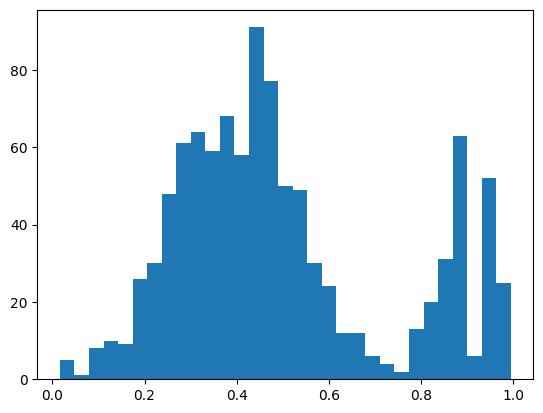

In [6]:
plt.hist(df["BodyTemp_numeric"], bins=31)

plt.show()

In [10]:
from Processing.CategoricalProcessing import CategoricalToNumericalNorm as c2nn

In [11]:
category_inter = c2nn.create_category_intervals(df["BodyTemp"].values)

df["BodyTemp_numeric"] = df["BodyTemp"].apply(lambda x: c2nn.generate_number(x, category_inter))